In [16]:
import numpy as np
from scipy . optimize import newton
import matplotlib . pyplot as plt

""" 
Return One Dimensional Schroedinger eqation with Potential V (Harmonic Oscillator). 
"""
def Schroed(y , r , V , E ): 
    psi , phi = y
    dphidx = [ phi , (V -E )* psi ]
    return np . asarray ( dphidx )

""" 
SOLVING THE WAVE FUNCTION
Runge Kutta method of 4th order used to solve phi ’= f ( psi , x ) with psi ( x [0])= psi0 .
Integrates function f with inital values psi0 and potenital V numerically.
"""
def rk4 (f , psi0 , x , V , E ): 
    n = len (x)
    psi = np . array ([ psi0 ]* n)
    for i in range (n - 1):
        h = x [i +1] - x[i]
        k1 = h*f ( psi [ i], x[i] , V [i], E)
        k2 = h*f ( psi [ i] + 0.5* k1 , x [i] + 0.5* h , V[ i], E)
        k3 = h*f ( psi [ i] + 0.5* k2 , x [i] + 0.5* h , V[ i], E)
        k4 = h*f ( psi [ i] + k3 , x[i +1] , V[i], E)
        psi [i +1] = psi [i] + ( k1 + 2.0*( k2 + k3 ) + k4 ) / 6.0
    return psi

""" 
Shooting method : find zeroes of the function func(Schroedinger equation to solve) for energies in E_arr .
psi0 : initial conditions on left side , can be array .
V : Potential to solve SE with.
E_arr : array of energy values : find possible zeroes .
"""
def shooting ( func , psi0 , x , V , E_arr ):
    psi_rightb = []
    for EN in E_arr :
        psi = rk4 ( func , psi0 , x , V , EN )
        psi_rightb . append ( psi [ len ( psi ) -1][0])
    return np . asarray ( psi_rightb )

"""
Helper Function for Shooting Method
"""
def shoot_helper (E , func , psi0 , x , V ):
    psi = rk4 ( func , psi0 , x , V , E )
    return psi [ len ( psi ) -1][0]

""" 
Find zero crossing due to sign change in input array .
Return array with array indices before sign change occurs.
"""
def findZeros ( rightbound_vals ):
    return np . where ( np . diff ( np . signbit ( rightbound_vals )))[0]

"""
FINDING THE ENERGY EIGENVALUES FROM A GIVEN LIST OF ENERGY VALUES
Using Shooting Algorithm
"""
def optimizeEnergy ( func , psi0 , x , V , E_arr ):
    shoot_try = shooting ( func , psi0 , x , V , E_arr )
    crossings = findZeros ( shoot_try )
    energy_list = []
    for cross in crossings :
        energy_list . append ( newton ( shoot_helper , E_arr [ cross ], args =( func , psi0 , x , V )))
    return np . asarray ( energy_list )

"""
Function to normalize the wave function to 1
"""
def normalize(output_wavefunc):
    norm_output_wavefunc=output_wavefunc/max(output_wavefunc)
    return norm_output_wavefunc

"""
xmin(-4.0) & xmax(4.0) minimum and maximum of the range
size of divisions for x(h_)
"""
def Potential_MainFunc ( psi_init , h_ ):
    x_arr_qho = np . arange ( -4.0, 4.0+ h_ , h_ )
    V_qho = x_arr_qho **2
    E_arr = np . arange (1.0 , 75.0 , 1.0)
    eigEn = optimizeEnergy ( Schroed , psi_init , x_arr_qho , V_qho , E_arr )#Find Energy Eigenvalues
    qho_out_list = []
    for EN in eigEn :
        out = rk4 ( Schroed , psi_init , x_arr_qho , V_qho , EN )#Solve for the wave functions
        qho_out_list.append(normalize(out [: , 0])) #Normalize the wavefunctions
    qho_out_arr = np.asarray(qho_out_list)
    return x_arr_qho , qho_out_arr, eigEn 



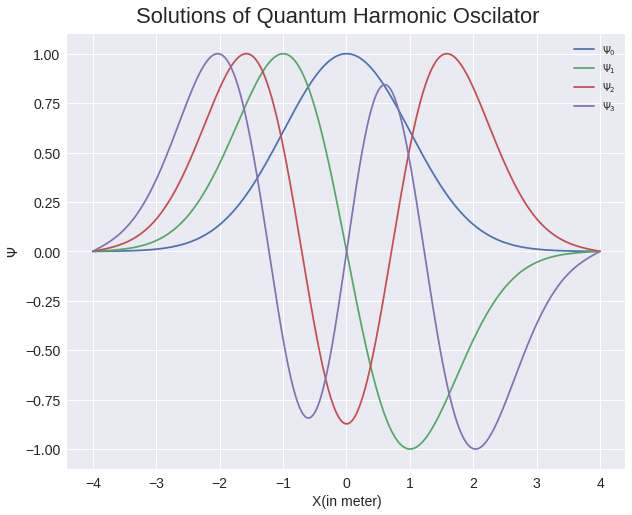

In [21]:
from matplotlib import style
style.use('seaborn')
psi_0 = 0.0
phi_0 = 1.0
psi_init = np . asarray ([ psi_0 , phi_0 ])
h_ = 1.0/200.0   
qho_x , qho_num, eigEn = Potential_MainFunc ( psi_init , h_ )

"""
Plotting the first three wavefunctions
"""
fig=plt.figure(figsize=(10,8))
plt.ylabel("Psi(x)")
plt.xlabel("x")
plt.plot(qho_x,(qho_num[0]),label=r"$\Psi_{0}$")
plt.plot(qho_x,(qho_num[1]),label=r"$\Psi_{1}$")
plt.plot(qho_x,(qho_num[2]),label=r"$\Psi_{2}$")
plt.plot(qho_x,(qho_num[3]),label=r"$\Psi_{3}$")
plt.figtext(.5,.9,'Solutions of Quantum Harmonic Oscilator', fontsize=22, ha='center')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("X(in meter)",fontsize=14)
plt.ylabel(r"$\Psi$",fontsize=14)
plt.legend()
plt.savefig("Wavefunc_Plot.png",format="png")
plt.show()